In [3]:
# 导入依赖库
import numpy as np
import pandas as pd

In [16]:
def distEclud (vec1, vec2):
    return np.sqrt(np.sum(np.power(vec1-vec2, 2)))

def initCentroids (dataSet, k):
    n = dataSet.shape[1]
    centroids = pd.DataFrame(np.zeros((k, n)))
    data_min = dataSet.min()
    data_range = dataSet.max() - data_min
    for j in range(n):
        minJ = data_min[j]
        rangeJ = float(data_range[j])
        centroids.iloc[:,j] = minJ + rangeJ * np.random.rand(k, 1)
    return centroids

def kMeans(data, k):
    m = data.shape[0]
    clusterAssment = pd.DataFrame(np.zeros((m, 2)), columns=['clusterName', 'dist'])
    centroids = initCentroids(data, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                # print(i, j, m, len(centroids))
                dist = distEclud(data.iloc[i, :], centroids.iloc[j, :])
                if dist < minDist:
                    minDist = dist
                    minIndex = j
            if clusterAssment.iloc[i,0] != minIndex:
                clusterChanged = True
            clusterAssment.iloc[i,:] = minIndex,minDist**2
        #print centroids
        centroids = data.groupby(clusterAssment.clusterName).mean()
    return centroids, clusterAssment

In [4]:
# 绘制二维图片
%matplotlib inline
import matplotlib.pyplot as plt

def showCluster(dataSet, k, centroids, clusterAssment):
    numSample, dim = dataSet.shape
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print('Sorry! Your k is too large! ')
        return 1
    
    # draw
    for i in range(numSample):
        markIndex = int(clusterAssment.iloc[i, 0])
        plt.plot(dataSet.iloc[i, 0], dataSet.iloc[i, 1], mark[markIndex])
    
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids.iloc[i, 0], centroids.iloc[i, 1], mark[i], markersize = 12)
    
    plt.show()

### 测试


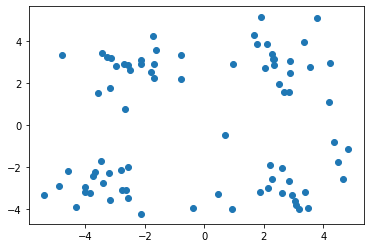

In [14]:
# 测试数据是二维的，共80个样本。有4个类。
data = pd.read_csv('./data/testSet.txt', header=None, sep='\s+')
plt.scatter(x=data.iloc[:, 0], y=data.iloc[:, 1])

                    0         1
clusterName                    
0.0         -3.382370 -2.947336
1.0          2.626530  3.108680
2.0         -2.461543  2.787376
3.0          2.802931 -2.731515


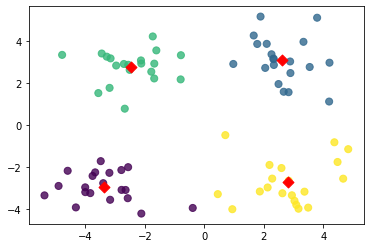

In [42]:
centroids, clusterAssment = kMeans(data, 4)
# showCluster(data, 4, centroids, clusterAssment)
print(centroids)
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=clusterAssment.iloc[:,0], s=50, alpha=0.8)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker='D', c='red', s=60)

# 强化学习
使用 sklearn

In [18]:
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters=4).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]


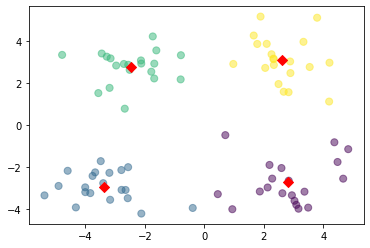

In [47]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='D', s=50)

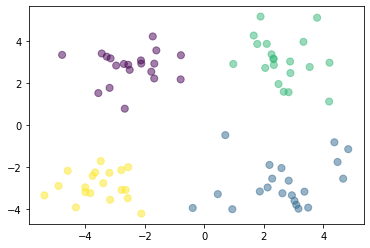

In [28]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=clusterAssment.iloc[:,0], s=50, alpha=0.5)